In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Zbar (Murillo Based on More)

In [ ]:
def zbar(Z, num_density, T):
    """
    Finite Temperature Thomas Fermi Charge State using 
    R.M. More, "Pressure Ionization, Resonances, and the
    Continuity of Bound and Free States", Adv. in Atomic 
    Mol. Phys., Vol. 21, p. 332 (Table IV).
    
    Z = atomic number
    num_density = number density (1/cc)
    T = temperature (eV)
    """

    alpha = 14.3139
    beta = 0.6624
    a1 = 0.003323
    a2 = 0.9718
    a3 = 9.26148e-5
    a4 = 3.10165
    b0 = -1.7630
    b1 = 1.43175
    b2 = 0.31546
    c1 = -0.366667
    c2 = 0.983333
    
    convert = num_density*1.6726e-24
    R = convert/Z
    T0 = T/Z**(4./3.)
    Tf = T0/(1 + T0)
    A = a1*T0**a2 + a3*T0**a4
    B = -np.exp(b0 + b1*Tf + b2*Tf**7)
    C = c1*Tf + c2
    Q1 = A*R**B
    Q = (R**C + Q1**C)**(1/C)
    x = alpha*Q**beta

    return Z*x/(1 + x + np.sqrt(1 + 2.*x))
# zbar(13,5.967e+22, 1)
zbar(18, 6e20, 1.2)

0.8538504342850854

In [ ]:
zbar(13, 5.697e22, 1 )

2.4365272544154912

# Plot Z*/Zbar

In [19]:
# rs = 3 (SOLID DENSITY)
my_TFD_NPA_Ts = [1,10,50,100]
my_TFD_NPA_Zstars = [3.2,3.2,5.2,7.]

my_TFD_AA_Ts = [1,10,50,100]
my_TFD_AA_Zstars = [2.04, 2.75, 5.27 ,7.16]

In [20]:
# n=1e22
# my_TFD_NPA_Ts = [1,5,10,50,100,500,1000]
# my_TFD_NPA_Zstars = [0.7,1.7,2.5,6.1,8.5,12.4,12.8]

In [21]:
MM_NPA_Ts, MM_NPA_Zstars = np.array([[5.11450504972058,   3.0163934426229506],
[10.104496381022852,  3.027322404371585],
[20.067028615617833, 3.5081967213114753],
[30.256078694746794,   4.28415300546448],
[40.26856374600249,  5.103825136612022],
[60.08707154412468, 6.251366120218579],
[79.5567807021131, 7.191256830601093],
[101.04496381022851, 7.726775956284153],
[199.62996638292896, 9.562841530054644]] ).T

GP_AA_Ts, GP_AA_Zstars = np.array([[0.0992662705695525,  3.014888337468983],
[0.980553321974707,   3.002481389578164],
[4.214377896234591,  3.0272952853598016],
[6.180801214239726,  3.0521091811414394],
[9.335750868773577,   3.176178660049628],
[14.205352845215044,  3.449131513647643],
[11.729955789899613, 3.3002481389578167],
[17.848394113818813, 3.6848635235732012],
[23.26685803023974,  4.0446650124069485],
[29.66753407786115,   4.491315136476427],
[34.62945279460377,   4.863523573200993],
[41.02101447998807,   5.359801488833747],
[48.23573160038079,   5.806451612903226],
[60.606051630880664,  6.501240694789082],
[100., 7.928039702233251]]).T

In [22]:
# Aluminum https://www-amdis.iaea.org/FLYCHK/ZBAR/csd013.php
# amdis_Ts, amdis_Zstars = np.array([[0.5,  1.0000E+00],     [1.0,  1.0001E+00],      [1.5,  1.0010E+00],      [2.0,  1.0050E+00],      [5.0,  1.1448E+00],      [7.0,  1.3277E+00],     [10.0,  1.6607E+00],     [15.0,  2.2529E+00],     [23.0,  3.6011E+00],     [32.0,  4.8602E+00],     [52.0,  7.1543E+00],     [74.0,  8.7997E+00],    [100.0,  1.0023E+01],    [165.0,  1.0714E+01],    [235.0,  1.0862E+01],    [310.0,  1.1020E+01],    [390.0,  1.1296E+01],    [475.0,  1.1591E+01],    [655.0,  1.2082E+01],    [845.0,  1.2433E+01],   [1000.0,  1.2609E+01],   [1441.0,  1.2822E+01],   [1925.0,  1.2902E+01],   [2454.0,  1.2934E+01],   [3030.0,  1.2951E+01],   [3655.0,  1.2964E+01],   [4331.0,  1.2970E+01],   [5060.0,  1.2976E+01],   [5844.0,  1.2980E+01],   [6685.0,  1.2983E+01],   [7585.0,  1.2985E+01],   [8546.0,  1.2987E+01],  [10000.0,  1.2989E+01],  [20000.0,  1.2994E+01],  [50000.0,  1.2998E+01], [100000.0,  1.2999E+01]]).T


In [23]:
T_list = np.geomspace(0.1,100,num=100)
More_Ts, More_Zstars = T_list, zbar(13,5.967e22, T_list) 

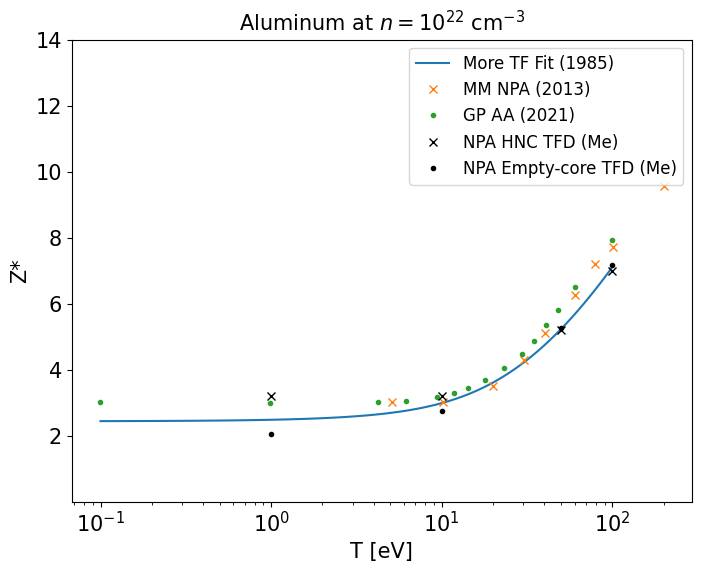

In [26]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(More_Ts, More_Zstars, '-',label='More TF Fit (1985)')
ax.plot(MM_NPA_Ts, MM_NPA_Zstars, 'x',label='MM NPA (2013)')
ax.plot(GP_AA_Ts, GP_AA_Zstars, '.',label='GP AA (2021)')

# ax.plot(amdis_Ts, amdis_Zstars,'-', label= 'AMDIS data')
ax.plot(my_TFD_NPA_Ts, my_TFD_NPA_Zstars,'xk', label='NPA HNC TFD (Me)')
ax.plot(my_TFD_AA_Ts, my_TFD_AA_Zstars,'.k', label='NPA Empty-core TFD (Me)')

ax.set_ylim(1e-2,14)

# ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title(r'Aluminum at $n=10^{22}$ cm$^{-3}$',fontsize=15)
ax.set_ylabel('Z*',fontsize=15)
ax.set_xlabel("T [eV]",fontsize=15)
ax.tick_params(labelsize=15)
ax.legend(fontsize=12)